<a href="https://colab.research.google.com/github/PERAPRO/codigosCP/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Nacional de Colombia

Matematicas discretas 2 2020-2

Autores: Daniel Esteban Perez Mahecha, Daniel Santiago Silva Capera

# Cifrado de Imagenes mediante permutaciones de grupos de pixeles


#1. Introducción

Debido a que la información cada vez es más accesible debido a las redes sociales, la mensajería instantanea y a internet en general, es cada vez más preocupante la privacidad e integridad de la información que se maneja y que esté disponible unicamente para un destinatario en concreto, aún más si se trata de contenido sensible utilizando imagenes.

Cuando se habla de asegurar (en la medida de lo posible) que un mensaje sea legible para un único destinatario, es claro que se habla de criptografía, es decir, del cifrado de mensajes. Existen varios métodos para cifrar el contenido de un mensaje, como RSA como uno de los más famosos.

Dado este contexto, se decidió optar por realizar un cifrador de imagenes que fuese accesible y rápido, en el que los únicos que puedan visibilizar su contenido sean a quienes se les dirige. Esto puede llegar a ser de utilidad para el intercambio de imagenes por mensajería instantanea, cualquier tipo de red social o incluso por correo electronico para cifrar contenidos como estados de cuenta, claves o numeros de cuenta bancaria o cualquier clase de contenido que no se desee ser visto sino por un número muy reducido de personas.

#2. Materiales y métodos


In [ ]:
#Para instaar Pillow en caso de que no lo esté
!pip install Pillow

### Generador de números aleatorios

Utilizando grupos ciclicos y poniendolos en función del tiempo, se logró crear una función que permita arrojar un número aleatorio en un rango arbitrario de números enteros.

In [ ]:
from datetime import datetime #Se usa para hacer que se dependa del tiempo el número aleatorio que se obtenga
# Generador de números aleatorios de a a b
class random:
  call = -1
  def random(a,b): #De a a b inclusivo
    random.call
    random.call +=1
    random.call %=41
    # Se escogió 41, 21 y 997 al ser primos, aunque pudieron ser números más grandes
    # Para este ejercicio está bien.
    # a y b son los que delimitan el rango de los números que se va a retornar,
    # Así nque deben estar entre 0 y b-a, par obtener la cantidad de números esperados
    # en el conjunto, y se le añade a cada valor a, para que sean numeros de a a b.
    return  ((((datetime.now().microsecond + random.call)*21) % 997)% (b-a + 1)) + a

# Zona de pruebas
for i in range(50):
  print(random.random(-10, 50))

### Generador de alguna permutación aleatoria

Por definición, una permutación de un conjunto ordenado de elementos, son estos mismos elementos pero intercambiados de posiciones. Así que para seleccionar una permutación aleatoria, se generará sobre una lista el intercambio de sus elementos entre posiciones aleatorias, haciendo uso del generador de números aleatorios anteriormente definido. (así generamos permutaciones aleatorias, que son elementos del grupo de simetrías, utilizaremos las propiedades de este grupo más adelante).

In [ ]:
from datetime import datetime #Se usa para hacer que se dependa del tiempo el número aleatorio que se obtenga

# Generador de números aleatorios de a a b
class random:
  call = -1
  def random(a,b):
    random.call
    random.call +=1
    random.call %=41
    return  ((((datetime.now().microsecond + random.call)*21) % 997)% (b-a + 1)) + a

  def shuffle(List):
    length = len(List)
    for i in range(length):
      j = random.random(0, length - 1)
      List[i], List[j] = List[j], List[i]
    return List
              
              

# Zona de pruebas
lista = list(range(20))
random.shuffle(lista)
print(lista)

### Generador de llaves aleatorias
Utilizando el grupo de simetrias, se obtiene una permutación de carácter aleatorio y se genera su inversa, que servirá de llave para la permutación aplicada inicialmente.

In [ ]:
from datetime import datetime

# Generador de números aleatorios de a a b
class random:
  call = -1
  def random(a,b):
    random.call
    random.call +=1
    random.call %=41
    return  ((((datetime.now().microsecond + random.call)*21) % 997)% (b-a + 1)) + a

  def shuffle(List):
    length = len(List)
    for i in range(length):
      j = random.random(0, length - 1)
      List[i], List[j] = List[j], List[i]
    return List

def creaCifrado():
    longitud = random.random(8, 10) # Se escoge una longitud de llave aleatoria entre 8 y 10
    key = list(range(longitud))
    random.shuffle(key)
    return key

def creaLlave(permutacion):
    longitud = len(permutacion)
    key = list(range(longitud))
    ordered_key = key.copy()
    for i in range(longitud):
      key[permutacion[i]] = ordered_key[i]
    return key 


# Zona de pruebas

permutacion = creaCifrado()
llave = creaLlave(permutacion)

print(permutacion,llave)  

[4, 0, 1, 2, 6, 3, 8, 5, 7] [1, 2, 3, 5, 0, 7, 4, 8, 6]


### Veificación de elementos consecutivos en una lista

El condicional verifica que la secuencia sea creciente. Se utilizó teoría de números y aritmética modular para identificar en una lista el número de elementos que son consecutivos.

In [ ]:
def lia(arr): 
  longitud = len(arr)
  max_cons = 0
  for i in range(longitud):
    if (arr[(i+1)%longitud] - arr[i])% longitud == 1:
      max_cons += 1
  return max_cons

### Encriptación de imagenes

Utilizando cada una de las funciones definidas anteriormente, se creó un cifrado de imagenes, que consiste en manipular a las imagenes como matrices y aplicarle una permutación del grupo de simetrias por grupos de pixeles proporcionales al tamaño de la imagen.

El procedimiento es el siguiente:

Se aplican dos veces la misma permutación: La primera vez para conjuntos más grandes de pixeles, y la segunda para conjuntos más pequeños.

Una vez aplicada, se genera una llave que es inversa a la permutación aplicada anteriormente. A esta llave se le concatena la cantidad de pixeles por las que se agrupó y aplicó cada permutación, obteniendose una llave del siguiente estilo: \[inversa de la permutación aplicada, numero de pixeles agrupados en la primera permutación, numero de pixeles agrupados en la segunda permutación].

Tanto la permutación aplicada como el tamaño usado para cada permutación son generados aleatoriamente.

Para garantizar que la imagen obtenida sea lo menos comprensible o similar a la imagen original, se tuvo que controlar la cantidad de elementos en la permutación dada que fueran consecutivos, se limitó a no más de 2 elementos consecutivos por llave.


In [ ]:
from PIL import Image
from datetime import datetime
## g1 la grande entre 200 400
#g2 la peque entre 5 y 10

# Generador de números aleatorios de a a b
class random:
  call = -1
  def random(a,b):
    random.call
    random.call +=1
    random.call %=41
    return  ((((datetime.now().microsecond + random.call)*21) % 997)% (b-a + 1)) + a

  def shuffle(List):
    length = len(List)
    for i in range(length):
      j = random.random(0, length - 1)
      List[i], List[j] = List[j], List[i]
    return List

def creaCifrado():
    #repeticiones = 0
    longitud = random.random(8, 10) # Se escoge una longitud de llave aleatoria entre 8 y 10
    key = list(range(longitud))
    random.shuffle(key)
    #i = 0
    while True:
      if lia(key)< 2:
        return key
      else:
        key = list(range(longitud))
        random.shuffle(key)
    while i < longitud:
      print("xd")
      if i == key[i]:
        repeticiones += 1
      if repeticiones > 2:
        i = 0
        key = list(range(longitud))
        random.shuffle(key)
      i +=1
    return key

def creaLlave(permutacion, g1, g2):
    longitud = len(permutacion)
    key = list(range(longitud))
    ordered_key = key.copy()
    for i in range(longitud):
      key[permutacion[i]] = ordered_key[i]
    key.append(g1)
    key.append(g2)
    print("Aquí esta su llave",key)
    return key 

def permci (start,pe,idx,obj,t):
    aux=[]
    rango=len(pe)
    for i in range (rango):
        corte=Image.new('RGB',(t,t),(255,255,255))
        corte.paste(obj.crop((start+(i*t),idx,start+(i*t)+t,idx+t)))
        aux.append(corte)
    for i in range (rango):
        pegar=(start+(i*t),idx)
        obj.paste(aux[pe[i]],pegar)

def permcj(start,pe,idx,obj,t):
    aux=[]
    rango=len(pe)
    for i in range (rango):
        corte=Image.new('RGB',(t,t),(255,255,255))
        corte.paste(obj.crop((idx,start+(i*t),idx+t,start+(i*t)+t)))
        aux.append(corte)
    for i in range (rango):
        pegar=idx,start+(i*t)
        obj.paste(aux[pe[i]],pegar)

def cifrar(pix,img,pe):
    alto=img.size[1]
    ancho=img.size[0]
    lon=len(pe)
    for i in range(0,alto,pix):
        for j in range (0,ancho,lon*pix):
            if j+(lon*pix)<ancho:
                permci(j,pe,i,img,pix)

    for i in range(0,alto,lon*pix):
        for j in range(0,ancho,pix):
            if i+(lon*pix)<alto:
                permcj(i,pe,j,img,pix)

def laCifracion(img):
  permutacion = creaCifrado()
  g1 = random.random(max(img.size)//25,max(img.size)//15)
  g2 = random.random(5,8)
  cifrar(g1, img, permutacion)
  cifrar(g2, img, permutacion)
  creaLlave(permutacion, g1, g2)
  img.save("ImagenCifrada.jpg")

def decifrar(img):
  key = list(map(int, input("Ingrese su llave separada por espacios: ").split()))
  g1 = key[-2]
  g2 = key[-1]
  key = key[:-2]
  #for k in range(2):
  #  print(key, key[-(k+1)], key[:-2])
  #  cifrar(key[-(k+1)], img, key[:-2])
  cifrar(g2, img, key)
  cifrar(g1, img, key)
  img.save("ImagenDecifrada.jpg")
  

def lia(arr): 
  longitud = len(arr)
  max_cons = 0
  for i in range(longitud):
    if (arr[(i+1)%longitud] - arr[i])% longitud == 1:
      max_cons += 1
  return max_cons


entrada = input("¿Desea cifrar? Y/N ").lower()

if entrada == 'n':
  nombre=input("Inserte el nombre de la imagen que desea decifrar (con extensión jpg) ")
  img=Image.open(nombre)
  decifrar(img)
else:
  nombre=input("Inserte el nombre de la imagen que desea cifrar (con extensión jpg) ")
  img=Image.open(nombre)
  laCifracion(img)
  img.show()


#decifrar(img)
#img.show()



¿Desea cifrar? Y/N n
Inserte el nombre de la imagen que desea decifrar (con extension jpg) ImagenCifrada.jpg
Ingrese su llave separada por espacios: 4 2 0 5 1 7 3 6 70 7


#3. Resultados

Al ejecutar nuestro código, nos preguntará si deseamos cifrar o decifrar la imagen, en caso de elegir la opción de cifrar, debemos tener cargada la imagen, y nos pedirá que ingresemos su nombre, luego nos dará la llave que debemos ingresar al momento de querer decifrar la imagen, y la guardará con el nombre de ImagenCifrada.jpg, y nos quedara un resultado como el que se muestra a continuación: 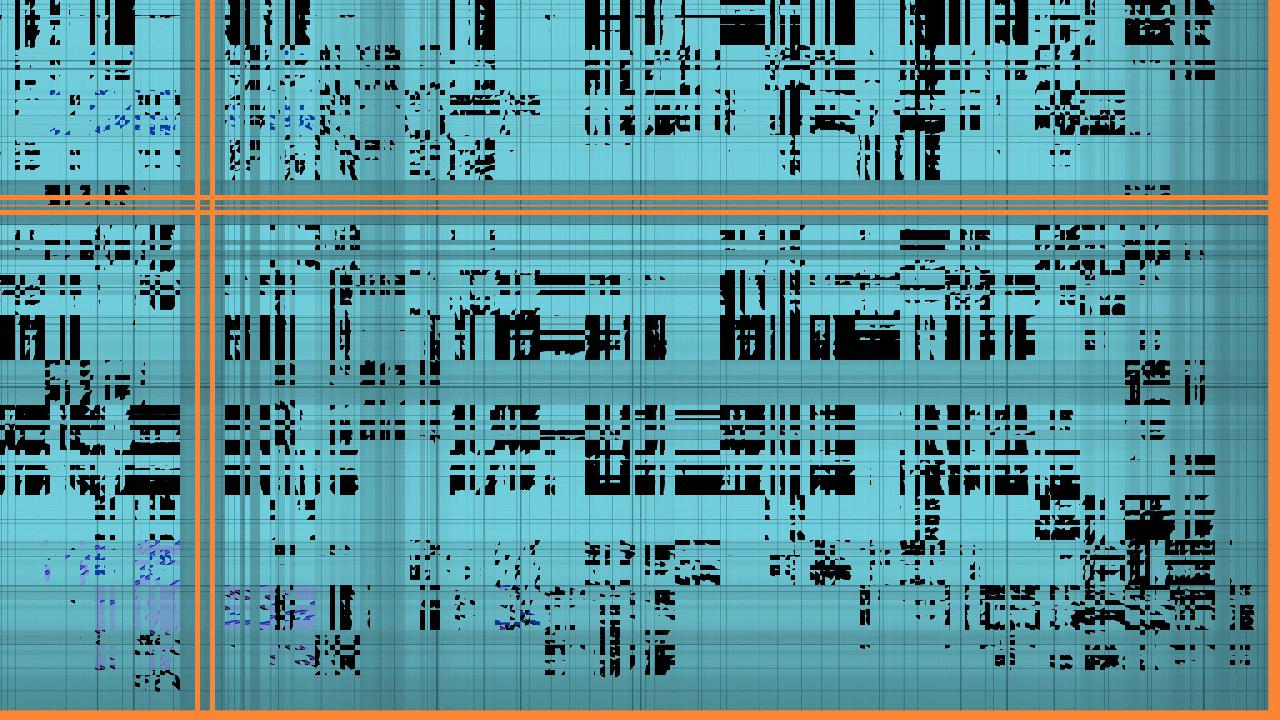
Al ingresar el nombre de la imagen que deseamos decifrar, nos pedirá la llave, y si seguimos los pasos correctamente nos guardará la imagen con el nombre de ImagenDecifrada.jpg y para el ejemplo anterior obtendremos un resultado como el siguiente: 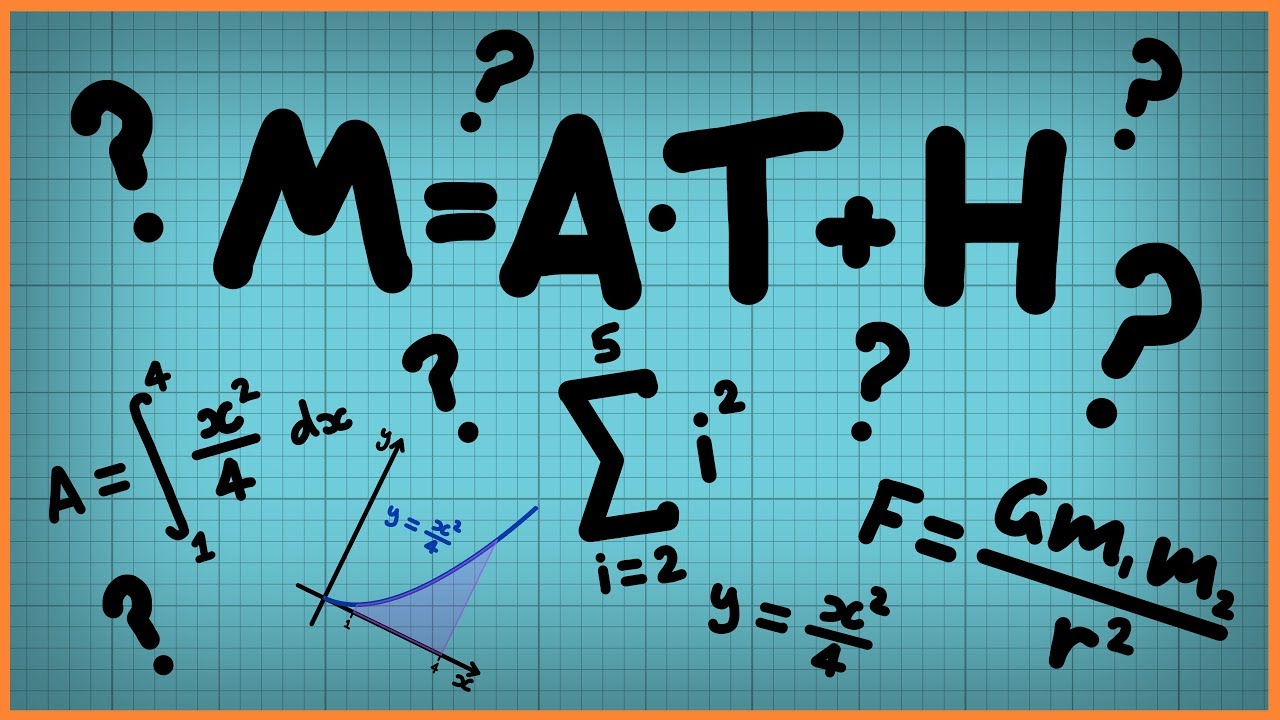


#4. Conclusiones




Se logró realizar la encripción de imagenes con éxito de cualquier dimensión utilizando los grupos de simetrías para realizar las permutaciones necesarias dos veces, obteniendo una llave única pseudo aleatoria con una baja probabilidad de ser decifrada. Adicionalmente, para obtener permutaciones funcionales, se observó que las permutaciones debían tener pocos números consecutivos en su llave, puesto que el resultado aunque no sería el mismo seguiría siendo similar a la imagen original, para ello se utilizó teoría de números y aritmética modular para que dado un arreglo se pudiera identificar cuales de ellos son consecutivos en orden ascendente y se controló dicho resultado.

Los resultados son satisfactorios y utiles. Se podría continuar su desarrollo para la integración con otras tecnologías como en mensajería instantanea u documentos con información o contenido sensible.






#5. Referencias

Para la realización del trabajo solo fue necesario tener en cuenta la docunemtación de la libreria Pillow disponible [aqui](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.height)
